In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
print(df_train.shape, df_test.shape)

(381109, 12) (127037, 11)


In [8]:
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [9]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
df_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

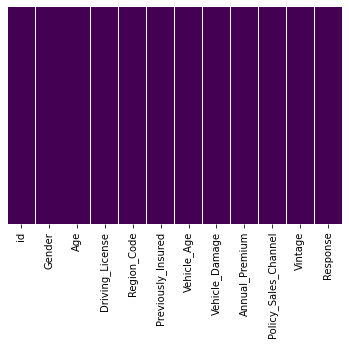

In [11]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values

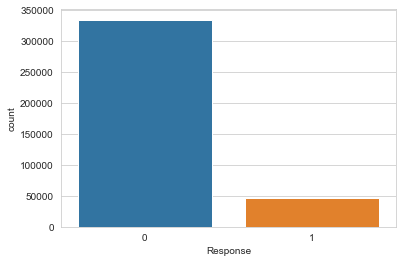

In [12]:
#Visualizing the "target" column

sns.set_style('whitegrid')
sns.countplot(x='Response', data=df_train)

In [14]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

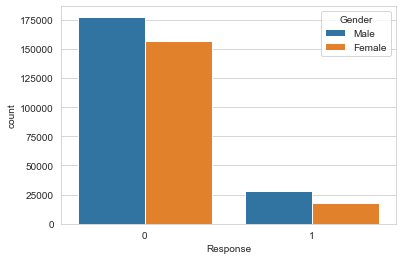

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Response', hue='Gender', data=df_train)

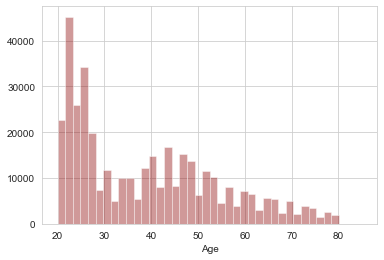

In [16]:
sns.distplot(df_train['Age'].dropna(),kde=False,color='darkred',bins=40)

In [18]:
df_train['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [19]:
df_train['Policy_Sales_Channel'].nunique()

155

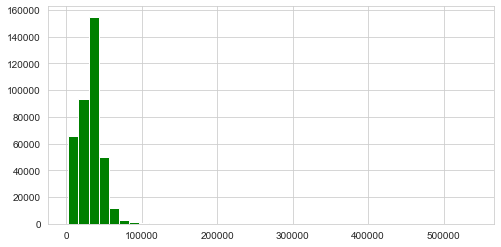

In [20]:
df_train['Annual_Premium'].hist(color='green',bins=40,figsize=(8,4))


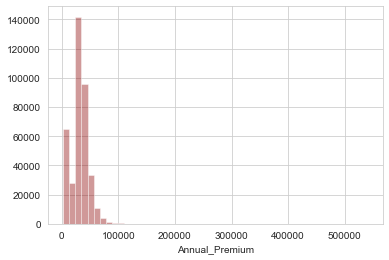

In [22]:
sns.distplot(df_train['Annual_Premium'].dropna(),kde=False,color='darkred')

In [23]:
df_train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [24]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [25]:
df_train['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [26]:
df_train['Response_flag'] = 1
df_test['Response_flag'] = 0
df_test['Response'] = None
print(df_train.shape, df_test.shape)

df_data = pd.concat((df_train, df_test))
print(df_data.shape)

(381109, 13) (127037, 13)
(508146, 13)


In [27]:
df_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_flag
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1


In [28]:
df_data.drop(['id','Region_Code'],axis=1,inplace=True)

In [29]:
df_data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                 object
Response_flag             int64
dtype: object

In [32]:
df_data.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Response_flag'],
      dtype='object')

In [33]:
cat=df_data.select_dtypes(['object']).columns
cat

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

In [34]:
cat=cat[:-1]
cat

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [35]:
df_data=pd.get_dummies(data=df_data,columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

In [36]:
df_data.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_flag,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,0,40454.0,26.0,217,1,1,0,1,0,0,1,0,1
1,76,1,0,33536.0,26.0,183,0,1,0,1,1,0,0,1,0
2,47,1,0,38294.0,26.0,27,1,1,0,1,0,0,1,0,1
3,21,1,1,28619.0,152.0,203,0,1,0,1,0,1,0,1,0
4,29,1,1,27496.0,152.0,39,0,1,1,0,0,1,0,1,0


In [37]:
df_data.columns

Index(['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Response_flag',
       'Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [38]:
df_data.dtypes

Age                        int64
Driving_License            int64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                  object
Response_flag              int64
Gender_Female              uint8
Gender_Male                uint8
Vehicle_Age_1-2 Year       uint8
Vehicle_Age_< 1 Year       uint8
Vehicle_Age_> 2 Years      uint8
Vehicle_Damage_No          uint8
Vehicle_Damage_Yes         uint8
dtype: object

In [39]:
df_train, df_test = df_data[df_data.Response_flag == 1], df_data[df_data.Response_flag == 0]


In [40]:
df_train.drop(['Response_flag'], inplace=True, axis=1)
df_test.drop(['Response_flag'], inplace=True, axis=1)
df_test.drop(['Response'], inplace=True, axis=1)

In [41]:
print(df_train.shape, df_test.shape)


(381109, 14) (127037, 13)


In [42]:
df_train.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,76,1,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,47,1,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,21,1,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,29,1,1,27496.0,152.0,39,0,1,0,0,1,0,1,0


In [43]:
df_test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,25,1,1,35786.0,152.0,53,0,1,0,1,0,1,0
1,40,1,0,33762.0,7.0,111,0,1,1,0,0,0,1
2,47,1,0,40050.0,124.0,199,0,1,1,0,0,0,1
3,24,1,1,37356.0,152.0,187,0,1,0,1,0,0,1
4,27,1,1,59097.0,152.0,297,0,1,0,1,0,1,0


In [44]:
del df_data


In [45]:
df_train['Response'] = df_train['Response'].astype(int)


In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Response',axis=1),df_train['Response'],test_size=0.30,random_state=101)

In [48]:
from sklearn.linear_model import LogisticRegression


In [49]:
#Instantiating the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [50]:
#Predicting in the test set
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix


In [52]:
accuracy=confusion_matrix(y_test,predictions)


In [53]:
accuracy

array([[100157,    229],
       [ 13861,     86]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score


In [55]:
accuracy=accuracy_score(y_test,predictions)

In [56]:
accuracy

0.8767634891063822

In [57]:
y_test.head()

234022    0
323529    0
332378    0
140813    0
249105    0
Name: Response, dtype: int32

In [58]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
X_test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
234022,35,1,0,31108.0,124.0,252,1,0,1,0,0,0,1
323529,23,1,1,26480.0,151.0,35,1,0,0,1,0,1,0
332378,47,1,0,2630.0,124.0,56,0,1,1,0,0,0,1
140813,25,1,0,52357.0,26.0,138,0,1,0,1,0,0,1
249105,25,1,1,30605.0,152.0,271,0,1,0,1,0,1,0


In [60]:
df_test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,25,1,1,35786.0,152.0,53,0,1,0,1,0,1,0
1,40,1,0,33762.0,7.0,111,0,1,1,0,0,0,1
2,47,1,0,40050.0,124.0,199,0,1,1,0,0,0,1
3,24,1,1,37356.0,152.0,187,0,1,0,1,0,0,1
4,27,1,1,59097.0,152.0,297,0,1,0,1,0,1,0


In [61]:
#Predicting in the final test set
predictions_final = logmodel.predict(df_test)

In [62]:
predictions_final

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
df_test['Response'] = predictions_final

In [64]:
df_test.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Response
0,25,1,1,35786.0,152.0,53,0,1,0,1,0,1,0,0
1,40,1,0,33762.0,7.0,111,0,1,1,0,0,0,1,0
2,47,1,0,40050.0,124.0,199,0,1,1,0,0,0,1,0
3,24,1,1,37356.0,152.0,187,0,1,0,1,0,0,1,0
4,27,1,1,59097.0,152.0,297,0,1,0,1,0,1,0,0


In [65]:
df_test['Response'].value_counts()

0    126654
1       383
Name: Response, dtype: int64

In [66]:
test = pd.read_csv("test.csv")

In [67]:
submit = pd.DataFrame({'id': test.id, 'Response': df_test.Response})


In [68]:
submit.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [69]:
submit.to_csv('submission.csv', index=False)